<a href="https://colab.research.google.com/github/Tonry12/Data_joyx2/blob/main/Lottery_Prediction_model_LSTM_model2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PrepareDATA

Link: https://medium.com/@polanitzer/forecasting-the-next-winning-numbers-in-the-texas-lottery-mega-millions-drawing-using-a-deep-4c37ee6d30f0

In [124]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [125]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy
import os
import pickle

In [126]:
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns

In [127]:
lotto = pd.read_csv('/content/drive/MyDrive/SPN/Predictive lottery.xlsx - since 30 years ago.csv')

In [128]:
lotto = lotto.drop(columns=['Date','Unnamed: 1','Unnamed: 2','Unnamed: 3'])

In [129]:
lotto

,DATE,รางวัลที่ 1,2 ตัวบน,3 ตัวบน,2 ตัวล่าง,3 ตัวหน้า,3 ตัวหน้า.1,3 ตัวล่าง,3 ตัวล่าง.1,weekday_dum,weekday
0,5/16/2024,205690,90,690,60,747,885,70,137,7,Saturday
1,5/2/2024,980116,16,116,17,104,763,634,833,4,Wednesday
2,4/16/2024,943598,98,598,79,727,729,154,200,3,Tuesday
3,4/1/2024,803481,81,481,90,122,809,559,947,2,Monday
4,3/16/2024,997626,26,626,78,509,571,329,794,7,Saturday
...,...,...,...,...,...,...,...,...,...,...,...
717,5/16/1994,2071764,64,764,29,93,544,535,746,2,Monday
718,5/2/1994,3072877,77,877,69,535,317,170,521,2,Monday
719,4/16/1994,7893913,13,913,21,785,982,151,594,7,Saturday
720,4/1/1994,4269815,15,815,29,675,35,704,868,6,Friday


In [130]:
lotto.isnull().any()

DATE           False
รางวัลที่ 1    False
2 ตัวบน        False
3 ตัวบน        False
2 ตัวล่าง      False
3 ตัวหน้า      False
3 ตัวหน้า.1    False
3 ตัวล่าง      False
3 ตัวล่าง.1    False
weekday_dum    False
weekday        False
dtype: bool

In [131]:
lotto.rename(columns={'DATE': 'Date','รางวัลที่ 1': '1st','3 ตัวบน':'top3','2 ตัวล่าง':'up2'},inplace=True)

In [132]:
lotto

,Date,1st,2 ตัวบน,top3,up2,3 ตัวหน้า,3 ตัวหน้า.1,3 ตัวล่าง,3 ตัวล่าง.1,weekday_dum,weekday
0,5/16/2024,205690,90,690,60,747,885,70,137,7,Saturday
1,5/2/2024,980116,16,116,17,104,763,634,833,4,Wednesday
2,4/16/2024,943598,98,598,79,727,729,154,200,3,Tuesday
3,4/1/2024,803481,81,481,90,122,809,559,947,2,Monday
4,3/16/2024,997626,26,626,78,509,571,329,794,7,Saturday
...,...,...,...,...,...,...,...,...,...,...,...
717,5/16/1994,2071764,64,764,29,93,544,535,746,2,Monday
718,5/2/1994,3072877,77,877,69,535,317,170,521,2,Monday
719,4/16/1994,7893913,13,913,21,785,982,151,594,7,Saturday
720,4/1/1994,4269815,15,815,29,675,35,704,868,6,Friday


In [133]:
ls= lotto.iloc[:,9:11]

In [134]:
lu= lotto.iloc[:,0:5]

In [135]:
lt = pd.concat([lu, ls], axis=1)

In [136]:
lt

,Date,1st,2 ตัวบน,top3,up2,weekday_dum,weekday
0,5/16/2024,205690,90,690,60,7,Saturday
1,5/2/2024,980116,16,116,17,4,Wednesday
2,4/16/2024,943598,98,598,79,3,Tuesday
3,4/1/2024,803481,81,481,90,2,Monday
4,3/16/2024,997626,26,626,78,7,Saturday
...,...,...,...,...,...,...,...
717,5/16/1994,2071764,64,764,29,2,Monday
718,5/2/1994,3072877,77,877,69,2,Monday
719,4/16/1994,7893913,13,913,21,7,Saturday
720,4/1/1994,4269815,15,815,29,6,Friday


In [137]:
lt = lt.drop(columns=['2 ตัวบน'])

In [138]:
lt

,Date,1st,top3,up2,weekday_dum,weekday
0,5/16/2024,205690,690,60,7,Saturday
1,5/2/2024,980116,116,17,4,Wednesday
2,4/16/2024,943598,598,79,3,Tuesday
3,4/1/2024,803481,481,90,2,Monday
4,3/16/2024,997626,626,78,7,Saturday
...,...,...,...,...,...,...
717,5/16/1994,2071764,764,29,2,Monday
718,5/2/1994,3072877,877,69,2,Monday
719,4/16/1994,7893913,913,21,7,Saturday
720,4/1/1994,4269815,815,29,6,Friday


In [139]:
lt.dtypes

Date           object
1st             int64
top3            int64
up2             int64
weekday_dum     int64
weekday        object
dtype: object

In [140]:
more = lt[lt['1st'] >= 999999]
more.count()

Date           20
1st            20
top3           20
up2            20
weekday_dum    20
weekday        20
dtype: int64

In [141]:
lt = lt[lt['1st'] <= 999999]

In [142]:
lt['up2'] = lt['up2'].apply(lambda x: '{:02}'.format(x))

In [143]:
lt['top3'] = lt['top3'].apply(lambda x: '{:03}'.format(x))

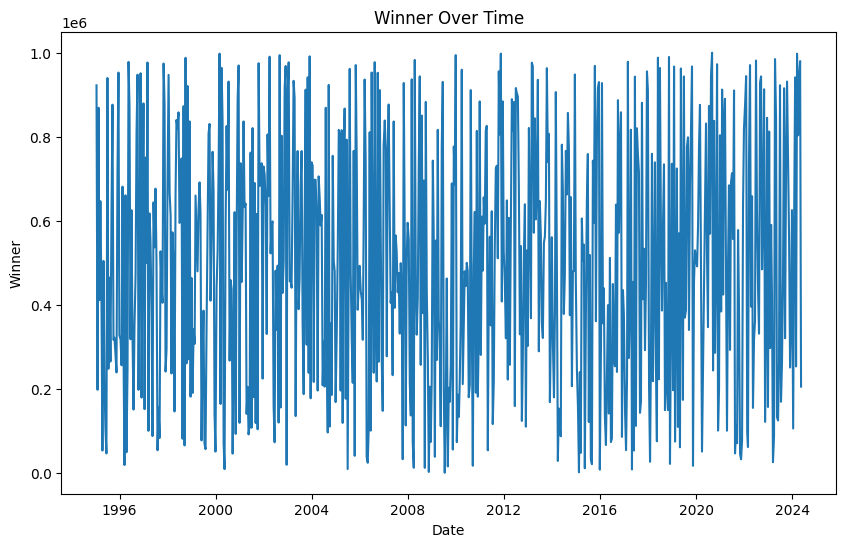

In [144]:
lt['Date'] = pd.to_datetime(lt['Date'])
plt.figure(figsize=(10,6))
plt.plot(lt['Date'], lt['1st'])
plt.title('Winner Over Time')
plt.xlabel('Date')
plt.ylabel('Winner')

plt.show()

<Axes: ylabel='1st'>

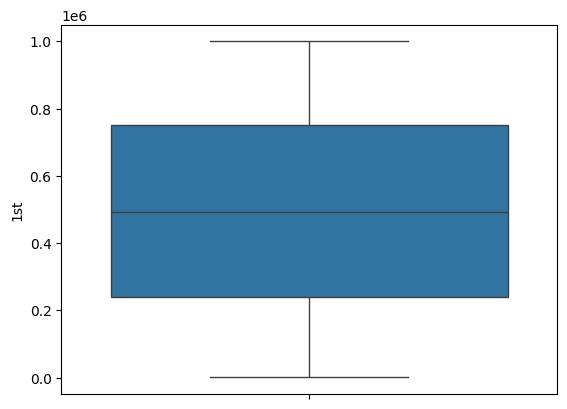

In [145]:
sns.boxplot(data=lt['1st'])

<Axes: ylabel='top3'>

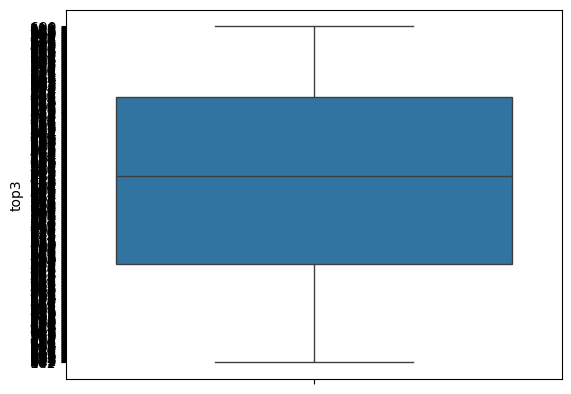

In [146]:
sns.boxplot(data=lt['top3'])

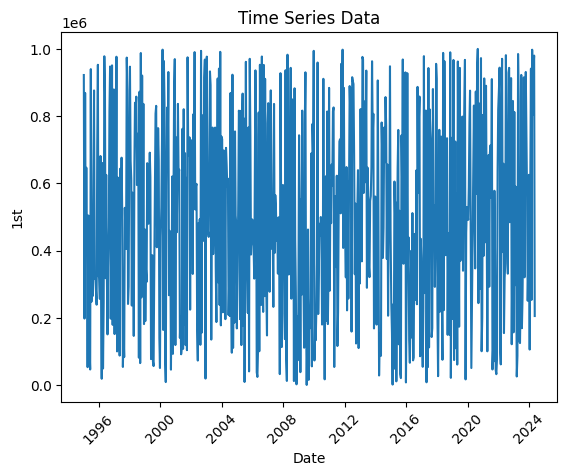

In [147]:
# Plot the time-series data
plt.plot(lt['Date'], lt['1st'])
plt.xlabel('Date')
plt.ylabel('1st')
plt.xticks(rotation = 45)
plt.title('Time Series Data')
plt.show()

In [148]:
import pandas as pd
from statsmodels.tsa.ar_model import AutoReg

# Create and fit the AR model
model = AutoReg(lt['1st'], lags=1)
ar_model = model.fit()

# Make predictions
predictions = ar_model.predict(start=len(lt), end=len(lt)+3)  # Replace 3 with the number of future values to predict

print(predictions)


702    480626.942592
703    497946.032907
704    497267.043928
705    497293.663458
dtype: float64


In [149]:
lt['Year'] = pd.to_datetime(lt['Date']).dt.year
lt['Month'] = pd.to_datetime(lt['Date']).dt.month
lt['Day'] = pd.to_datetime(lt['Date']).dt.day

In [150]:
lt_1 = lt.copy()

In [151]:
lt_1['up2'] = lt_1['up2'].astype(str)

# Split each value in the 'digi' column into its individual digits
lt_1['Tens digit'] = lt_1['up2'].apply(lambda x: int(x[0]))
lt_1['Units digit'] = lt_1['up2'].apply(lambda x: int(x[1]) if len(x) > 1 else 0)

In [152]:
lt_1['top3'] = lt_1['top3'].astype(str)

# Split each value in the 'digi' column into its individual digits
lt_1['c3_r1'] = lt_1['top3'].apply(lambda x: int(x[0]))
lt_1['c3_r2'] = lt_1['top3'].apply(lambda x: int(x[1]))
lt_1['c3_r3'] = lt_1['top3'].apply(lambda x: int(x[2]))

In [153]:
lt_1

,Date,1st,top3,up2,weekday_dum,weekday,Year,Month,Day,Tens digit,Units digit,c3_r1,c3_r2,c3_r3
0,2024-05-16,205690,690,60,7,Saturday,2024,5,16,6,0,6,9,0
1,2024-05-02,980116,116,17,4,Wednesday,2024,5,2,1,7,1,1,6
2,2024-04-16,943598,598,79,3,Tuesday,2024,4,16,7,9,5,9,8
3,2024-04-01,803481,481,90,2,Monday,2024,4,1,9,0,4,8,1
4,2024-03-16,997626,626,78,7,Saturday,2024,3,16,7,8,6,2,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
697,1995-03-16,646847,847,67,5,Thursday,1995,3,16,6,7,8,4,7
698,1995-03-01,411454,454,71,4,Wednesday,1995,3,1,7,1,4,5,4
699,1995-02-16,869070,070,95,5,Thursday,1995,2,16,9,5,0,7,0
700,1995-02-01,198162,162,48,4,Wednesday,1995,2,1,4,8,1,6,2


# LSTM Model

## ไม่ล่วงหน้า

In [154]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler

In [155]:
df = lt_1.copy()

In [156]:
df

,Date,1st,top3,up2,weekday_dum,weekday,Year,Month,Day,Tens digit,Units digit,c3_r1,c3_r2,c3_r3
0,2024-05-16,205690,690,60,7,Saturday,2024,5,16,6,0,6,9,0
1,2024-05-02,980116,116,17,4,Wednesday,2024,5,2,1,7,1,1,6
2,2024-04-16,943598,598,79,3,Tuesday,2024,4,16,7,9,5,9,8
3,2024-04-01,803481,481,90,2,Monday,2024,4,1,9,0,4,8,1
4,2024-03-16,997626,626,78,7,Saturday,2024,3,16,7,8,6,2,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
697,1995-03-16,646847,847,67,5,Thursday,1995,3,16,6,7,8,4,7
698,1995-03-01,411454,454,71,4,Wednesday,1995,3,1,7,1,4,5,4
699,1995-02-16,869070,070,95,5,Thursday,1995,2,16,9,5,0,7,0
700,1995-02-01,198162,162,48,4,Wednesday,1995,2,1,4,8,1,6,2


In [157]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler

In [158]:
df1 = df.copy()
df.drop(['Date','1st','weekday_dum','weekday','Year','Month','Day','Tens digit','Units digit','c3_r1','c3_r2','c3_r3'], axis=1, inplace=True)

number_of_features = df.shape[1]

In [159]:
df1.drop(['1st','weekday_dum','weekday','Year','Month','Day','Tens digit','Units digit','c3_r1','c3_r2','c3_r3'], axis=1, inplace=True)

In [160]:
window_length = 7
window_length

7

In [161]:
train = df.copy()
train.head((window_length+1))

,top3,up2
0,690,60
1,116,17
2,598,79
3,481,90
4,626,78
5,603,79
6,395,43
7,063,09


In [162]:
train_rows = train.values.shape[0]
train_samples = np.empty([ train_rows - window_length, window_length, number_of_features], dtype=float)
train_labels = np.empty([ train_rows - window_length, number_of_features], dtype=float)
for i in range(0, train_rows-window_length):
    train_samples[i] = train.iloc[i : i+window_length, 0 : number_of_features]
    train_labels[i] = train.iloc[i+window_length : i+window_length+1, 0 : number_of_features]

In [163]:
train_samples[0]

array([[690.,  60.],
       [116.,  17.],
       [598.,  79.],
       [481.,  90.],
       [626.,  78.],
       [603.,  79.],
       [395.,  43.]])

In [164]:
train_labels[0]

array([63.,  9.])

In [165]:
scaler = StandardScaler()
transformed_dataset = scaler.fit_transform(train.values)
scaled_train_samples = pd.DataFrame(data=transformed_dataset, index=train.index)

In [166]:
scaled_train_samples.head(window_length+1)

,0,1
0,0.646511,0.279825
1,-1.380838,-1.210434
2,0.321570,0.938311
3,-0.091670,1.319540
4,0.420465,0.903654
5,0.339230,0.938311
6,-0.395419,-0.309348
7,-1.568032,-1.487692


In [167]:
x_train = np.empty([ train_rows - window_length, window_length, number_of_features], dtype=float)
y_train = np.empty([ train_rows - window_length, number_of_features], dtype=float)

for i in range(0, train_rows-window_length):
    x_train[i] = scaled_train_samples.iloc[i : i+window_length, 0 : number_of_features]
    y_train[i] = scaled_train_samples.iloc[i+window_length : i+window_length+1, 0 : number_of_features]

In [168]:
y_train

array([[-1.56803198, -1.48769192],
       [ 1.66724904,  0.3144819 ],
       [ 0.13084375,  1.28488319],
       ...,
       [-1.54330822,  1.49282632],
       [-1.21836733, -0.13606156],
       [-0.42014297, -0.41331907]])

In [169]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Bidirectional, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import mse

In [170]:
# Initialising the RNN
model = Sequential()
# Adding the input layer and the LSTM layer
model.add(Bidirectional(LSTM(240,
                        input_shape = (window_length, number_of_features),
                        return_sequences = True)))
# Adding a first Dropout layer
model.add(Dropout(0.2))
# Adding a second LSTM layer
model.add(Bidirectional(LSTM(240,
                        input_shape = (window_length, number_of_features),
                        return_sequences = True)))
# Adding a second Dropout layer
model.add(Dropout(0.2))
# Adding a third LSTM layer
model.add(Bidirectional(LSTM(240,
                        input_shape = (window_length, number_of_features),
                        return_sequences = True)))
# Adding a fourth LSTM layer
model.add(Bidirectional(LSTM(240,
                        input_shape = (window_length, number_of_features),
                        return_sequences = False)))
# Adding a third Dropout layer
model.add(Dropout(0.2))
# Adding the first output layer
model.add(Dense(70))
# Adding the last output layer
model.add(Dense(number_of_features))


In [171]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Bidirectional, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import mse

In [172]:
# Initialising the RNN
model = Sequential()
# Adding the input layer and the LSTM layer
model.add(Bidirectional(LSTM(240,
                        input_shape = (window_length, number_of_features),
                        return_sequences = True)))
# Adding a first Dropout layer
model.add(Dropout(0.2))
# Adding a second LSTM layer
model.add(Bidirectional(LSTM(240,
                        input_shape = (window_length, number_of_features),
                        return_sequences = True)))
# Adding a second Dropout layer
model.add(Dropout(0.2))
# Adding a third LSTM layer
model.add(Bidirectional(LSTM(240,
                        input_shape = (window_length, number_of_features),
                        return_sequences = True)))
# Adding a fourth LSTM layer
model.add(Bidirectional(LSTM(240,
                        input_shape = (window_length, number_of_features),
                        return_sequences = False)))
# Adding a third Dropout layer
model.add(Dropout(0.2))
# Adding the first output layer
model.add(Dense(37))
# Adding the last output layer
model.add(Dense(number_of_features))

In [173]:
model.compile(optimizer=Adam(learning_rate=0.001), loss ='mse', metrics=['accuracy'])

In [174]:
model.fit(x=x_train, y=y_train, batch_size=128, epochs=200, verbose=2)

Epoch 1/200
6/6 - 26s - loss: 1.0100 - accuracy: 0.4791 - 26s/epoch - 4s/step
Epoch 2/200
6/6 - 4s - loss: 1.0091 - accuracy: 0.4820 - 4s/epoch - 699ms/step
Epoch 3/200
6/6 - 3s - loss: 1.0043 - accuracy: 0.5252 - 3s/epoch - 549ms/step
Epoch 4/200
6/6 - 3s - loss: 1.0064 - accuracy: 0.4964 - 3s/epoch - 510ms/step
Epoch 5/200
6/6 - 5s - loss: 1.0052 - accuracy: 0.5036 - 5s/epoch - 758ms/step
Epoch 6/200
6/6 - 4s - loss: 1.0019 - accuracy: 0.4964 - 4s/epoch - 741ms/step
Epoch 7/200
6/6 - 3s - loss: 1.0024 - accuracy: 0.5122 - 3s/epoch - 526ms/step
Epoch 8/200
6/6 - 3s - loss: 1.0031 - accuracy: 0.5209 - 3s/epoch - 517ms/step
Epoch 9/200
6/6 - 5s - loss: 1.0005 - accuracy: 0.5165 - 5s/epoch - 774ms/step
Epoch 10/200
6/6 - 4s - loss: 1.0018 - accuracy: 0.5079 - 4s/epoch - 693ms/step
Epoch 11/200
6/6 - 3s - loss: 0.9985 - accuracy: 0.5094 - 3s/epoch - 550ms/step
Epoch 12/200
6/6 - 3s - loss: 1.0041 - accuracy: 0.5007 - 3s/epoch - 535ms/step
Epoch 13/200
6/6 - 4s - loss: 0.9992 - accuracy: 0

### Prediction without rounding up or down the results

In [175]:
print('-' * 40)
print('Prediction vs. GoundTruth without rounding up or down')
for i in range(1,10):
  test = df1.copy()
  test = test.tail((window_length+10-i))
  test = test.head((window_length+1))
  test_Date = df1.iloc[ (test.tail().index[-1]) ]['Date']
  test1 = test.head((window_length))
  test1.drop(['Date'], axis=1, inplace=True)
  test1 = np.array(test1)
  x_test = scaler.transform(test1)
  y_test_pred = model.predict(np.array([x_test]))
  y_test_true = test.drop(['Date'], axis=1, inplace=True)
  y_test_true = test.tail(1)
  print('Drawing  Date', test_Date)
  print('Prediction:\t', scaler.inverse_transform(y_test_pred).astype(int)[0])
  print('GoundTruth:\t', np.array(y_test_true)[0])
  print('-' * 40)

----------------------------------------
Prediction vs. GoundTruth without rounding up or down
1/1 [==============================] - 3s 3s/step
Drawing  Date 1995-05-17 00:00:00
Prediction:	 [346  56]
GoundTruth:	 ['381' '55']
----------------------------------------
1/1 [==============================] - 0s 39ms/step
Drawing  Date 1995-05-02 00:00:00
Prediction:	 [692  89]
GoundTruth:	 ['692' '88']
----------------------------------------
1/1 [==============================] - 0s 38ms/step
Drawing  Date 1995-04-16 00:00:00
Prediction:	 [586 100]
GoundTruth:	 ['581' '99']
----------------------------------------
1/1 [==============================] - 0s 35ms/step
Drawing  Date 1995-04-01 00:00:00
Prediction:	 [46  4]
GoundTruth:	 ['039' '06']
----------------------------------------
1/1 [==============================] - 0s 38ms/step
Drawing  Date 1995-03-16 00:00:00
Prediction:	 [859  66]
GoundTruth:	 ['847' '67']
----------------------------------------
1/1 [========================

### Prediction with rounding up the results

In [176]:
print('-' * 40)
print('Prediction vs. GoundTruth with rounding up')
for i in range(1,10):
  test = df1.copy()
  test = test.tail((window_length+10-i))
  test = test.head((window_length+1))
  test_Date = df1.iloc[ (test.tail().index[-1]) ]['Date']
  test1 = test.head((window_length))
  test1.drop(['Date'], axis=1, inplace=True)
  test1 = np.array(test1)
  x_test = scaler.transform(test1)
  y_test_pred = model.predict(np.array([x_test]))
  y_test_true = test.drop(['Date'], axis=1, inplace=True)
  y_test_true = test.tail(1)
  print('Drawing  Date', test_Date)
  print('Prediction:\t', scaler.inverse_transform(y_test_pred).astype(int)[0]+1)
  print('GoundTruth:\t', np.array(y_test_true)[0])
  print('-' * 40)

----------------------------------------
Prediction vs. GoundTruth with rounding up
1/1 [==============================] - 0s 40ms/step
Drawing  Date 1995-05-17 00:00:00
Prediction:	 [347  57]
GoundTruth:	 ['381' '55']
----------------------------------------
1/1 [==============================] - 0s 43ms/step
Drawing  Date 1995-05-02 00:00:00
Prediction:	 [693  90]
GoundTruth:	 ['692' '88']
----------------------------------------
1/1 [==============================] - 0s 45ms/step
Drawing  Date 1995-04-16 00:00:00
Prediction:	 [587 101]
GoundTruth:	 ['581' '99']
----------------------------------------
1/1 [==============================] - 0s 48ms/step
Drawing  Date 1995-04-01 00:00:00
Prediction:	 [47  5]
GoundTruth:	 ['039' '06']
----------------------------------------
1/1 [==============================] - 0s 42ms/step
Drawing  Date 1995-03-16 00:00:00
Prediction:	 [860  67]
GoundTruth:	 ['847' '67']
----------------------------------------
1/1 [==============================] -

### Predict the Future Drawing Results on June 1, 2o24

In [181]:
next_Date = '2024-06-01'
print('-' * 40)
print('Predict the Future Drawing on 01/06/2024')
next = df.copy()
next = next.tail((window_length))
next = np.array(next)
x_next = scaler.transform(next)
y_next_pred = model.predict(np.array([x_next]))
print('Drawing  Date', next_Date)
print('Prediction without rounding up or down:\t', scaler.inverse_transform(y_next_pred).astype(int)[0])
print('Prediction with rounding up           :\t', scaler.inverse_transform(y_next_pred).astype(int)[0]+1)
print('Prediction with rounding down         :\t', scaler.inverse_transform(y_next_pred).astype(int)[0]-1)
print('-' * 40)

----------------------------------------
Predict the Future Drawing on 01/06/2024
1/1 [==============================] - 0s 150ms/step
Drawing  Date 2024-06-01
Prediction without rounding up or down:	 [448  71]
Prediction with rounding up           :	 [449  72]
Prediction with rounding down         :	 [447  70]
----------------------------------------
